In [40]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
work = pd.read_csv('work.csv')

In [3]:
unwork = pd.read_csv('unwork.csv')

In [4]:
GDP = pd.read_csv('GDP.csv')

In [5]:
people = pd.read_csv('people.csv')

In [11]:
result = pd.merge(pd.merge(pd.merge(work, unwork), GDP), people)

In [13]:
result # Используются данные по странам только за 2013 год, т.к. их тяжело найти

,Страна,Производительность труда,Уровень безработицы,ВВП,Население
0,Норвегия,75.08,3.60.,288619,4722701
1,Люксембург,73.22,4.90.,46846,514862
2,США,67.32,7.30.,16237746,316668567
3,Бельгия,60.98,8.80.,427883,10444268
4,Нидерланды,60.06,6.80.,714741,16805037
5,Германия,57.36,5.30.,3269562,81147265
6,Ирландия,56.05,13.50.,190890,4775982
7,Австралия,55.87,5.70.,1015943,22262501
8,Дания,55.75,6.00.,219563,5556452
9,Швеция,55.28,8.10.,403433,9119423


In [57]:
help_list = []

In [58]:
for i in result['Уровень безработицы']:
    help_list.append(float(i[:-1]))

In [60]:
result['Уровень безработицы'] = help_list

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
train_data, test_data = train_test_split(result, test_size=0.2)

In [66]:
y = train_data['ВВП'].to_numpy().reshape(-1, 1)

In [67]:
work = train_data['Производительность труда'].to_numpy().reshape(-1, 1)

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
model = LinearRegression()

In [70]:
model.fit(work, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
y_pred = model.predict(work)

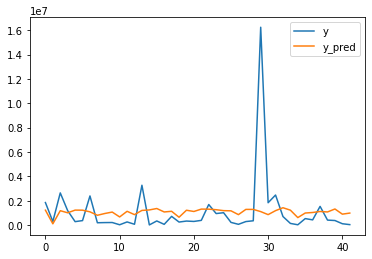

In [81]:
plt.plot(y, label='y')
plt.plot(y_pred, label='y_pred')
plt.legend()

In [76]:
unwork = train_data['Уровень безработицы'].to_numpy().reshape(-1,1)

In [77]:
model = LinearRegression()

In [78]:
model.fit(unwork, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
y_pred = model.predict(unwork)

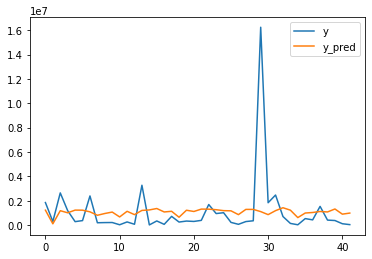

In [80]:
plt.plot(y, label='y')
plt.plot(y_pred, label='y_pred')
plt.legend()

In [82]:
people = train_data['Население'].to_numpy().reshape(-1,1)

In [83]:
model = LinearRegression()

In [84]:
model.fit(people, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
y_pred = model.predict(people)

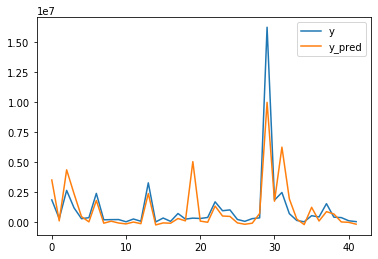

In [87]:
plt.plot(y, label='y')
plt.plot(y_pred, label='y_pred')
plt.legend()

In [90]:
X = train_data[['Производительность труда', 'Уровень безработицы', 'Население']].to_numpy()

In [92]:
model = LinearRegression()

In [93]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
y_pred = model.predict(X)

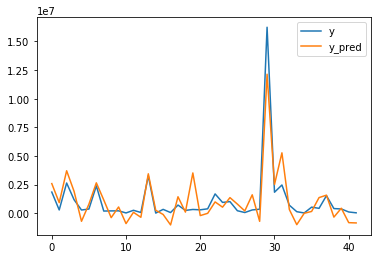

In [95]:
plt.plot(y, label='y')
plt.plot(y_pred, label='y_pred')
plt.legend()

In [98]:
model.score(X, y)

0.7997683868012619

$R^2 = 0.79$, что говорит об удовлетворительном качестве модели